### Project Name: *Housing Data Analysis: Prediction, Segmentation, and Trends*			
### Authors
- [Ahmed Abdullah](https://github.com/ahmedembeddedx)
- [Zaeem ul Islam](https://github.com/mightyflavor)


# 🏡 **Unlocking the Secrets of Real Estate: A Journey into Homeownership and Beyond!**

![Home Image](https://i.ibb.co/QCjZjh6/Apartment-Square-Karachi-Gulshan-e-Iqbal.jpg)


# Project Part - I

## 1 *Necessary Libraries*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import tkinter as tk
from tkinter import ttk

## 2 *Loading Dataset & Head Entries*

In [19]:
data = pd.read_csv("data.csv", encoding="ISO-8859-1", low_memory=False)

In [20]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,7322700.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,17754000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,5940000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,19932000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,16830000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3 *Data Preprocessing*

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [22]:
data.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,1.782291e+07,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,1.211520e+07,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,2.475000e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,1.062435e+07,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,1.485000e+07,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,2.128500e+07,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


### i. Dimension Reduction - I

In [23]:
columns_to_keep = [
     'price', 
     'bedrooms', 
     'bathrooms', 
     'sqft_living',
     'sqft_lot', 
     'floors', 
     'condition', 
     'grade',
     'sqft_above', 
     'sqft_basement', 
     'yr_built', 
     'yr_renovated',
     'sqft_living15', 
     'sqft_lot15',
     'lat',
     'long'
]

data = data[columns_to_keep]

In [24]:
memory_usage = data.memory_usage(deep=True).sum()

print(f"Memory usage of the DataFrame: {memory_usage / (1024**2):.2f} MB")

Memory usage of the DataFrame: 2.64 MB


### ii. Updating tuple conventions

In [25]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

## 4 *Data Cleaning*

### i. Identifying Outliers (IQR Method)

In [26]:
def count_outliers(dataframe, excluded_columns):
    outliers_per_column = {}
    for column in dataframe.columns:
        if column in excluded_columns:
            continue
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)).sum()
        outliers_per_column[column] = outliers

    return outliers_per_column

irrep=[
    'condition', 
    'grade',
    'sqft_basement',
    'yr_renovated'
]

count_outliers(data, irrep)


{'price': 1146,
 'bedrooms': 546,
 'bathrooms': 571,
 'sqft_living': 572,
 'sqft_lot': 2425,
 'floors': 0,
 'sqft_above': 611,
 'yr_built': 0,
 'sqft_living15': 544,
 'sqft_lot15': 2194,
 'lat': 2,
 'long': 256}

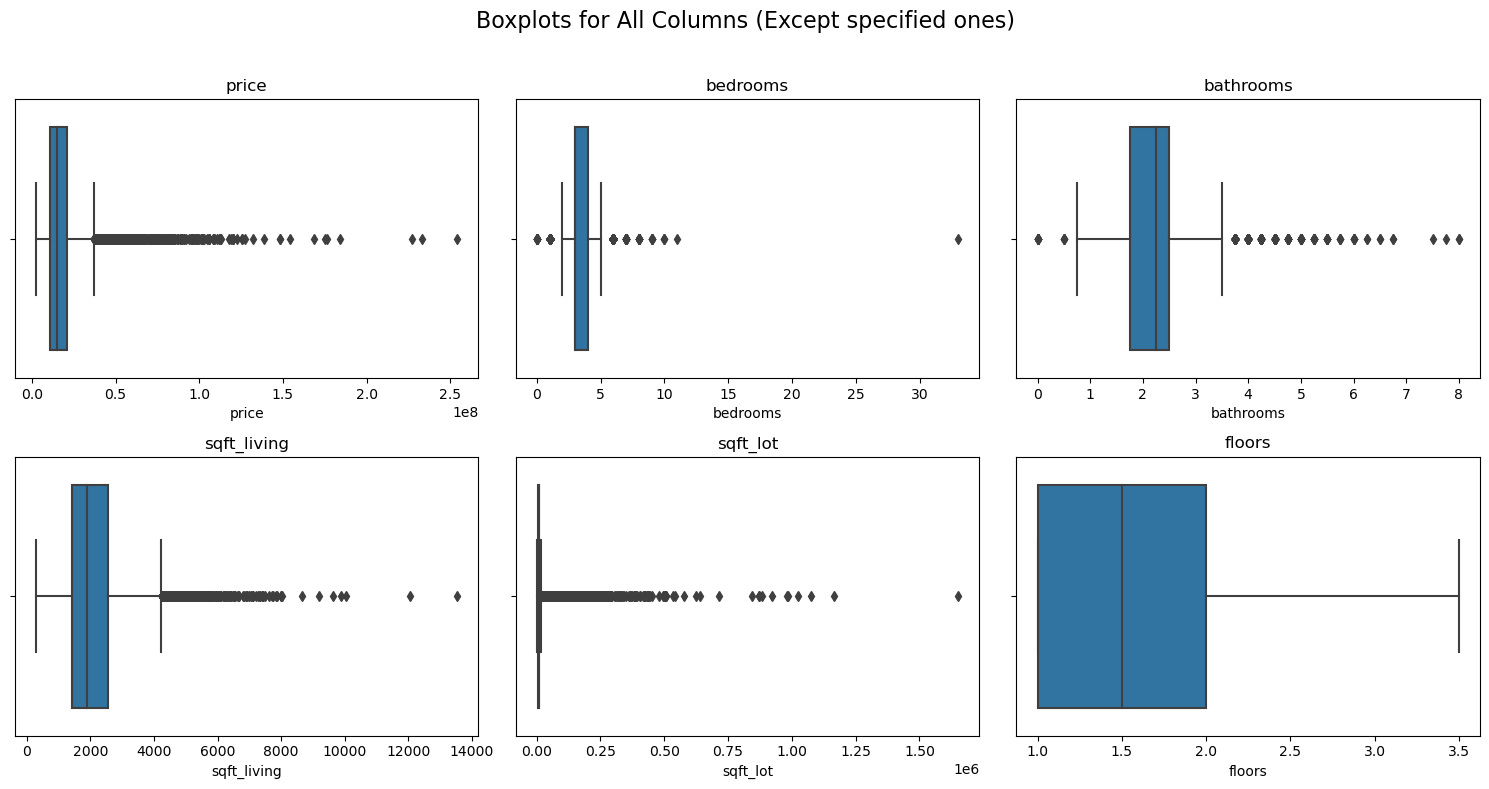

In [27]:
def plot_boxplots(dataframe, irrep):
    columns_to_plot = [col for col in dataframe.columns if col not in irrep]

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
    fig.suptitle('Boxplots for All Columns (Except specified ones)', fontsize=16)

    axes = axes.flatten()

    for i, column in enumerate(columns_to_plot):
        if i < 6:
            sns.boxplot(x=dataframe[column], ax=axes[i])
            axes[i].set_title(column)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
plot_boxplots(data, irrep)

### ii. Replacing Outliers (IQR Method)

In [28]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df.copy()

    if column_name not in irrep:
        df_filtered[column_name] = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)][column_name]

    return df_filtered

for column in columns_to_keep:
    data = remove_outliers(data, column)


In [29]:
count_outliers(data, irrep)

{'price': 264,
 'bedrooms': 0,
 'bathrooms': 0,
 'sqft_living': 101,
 'sqft_lot': 470,
 'floors': 0,
 'sqft_above': 159,
 'yr_built': 0,
 'sqft_living15': 116,
 'sqft_lot15': 357,
 'lat': 0,
 'long': 16}

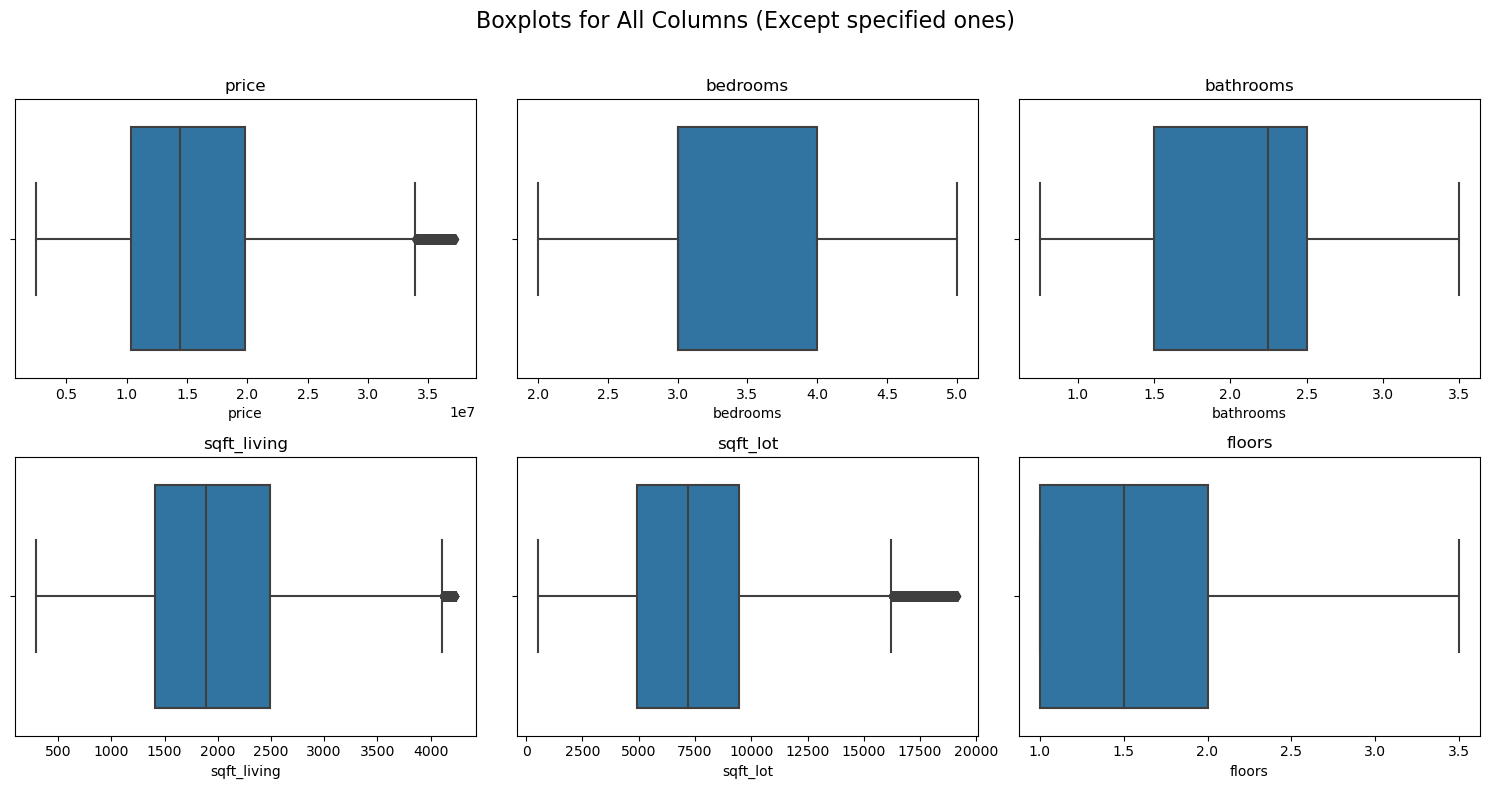

In [30]:
plot_boxplots(data, irrep)

### iii. Dropping Duplicates

In [31]:
data = data.drop_duplicates()

### iv. Resetting the Indices

In [32]:
data = data.reset_index(drop=True)

In [33]:
feature = [
     'price', 
     'sqft_living',
     'sqft_lot', 
     'sqft_above', 
     'sqft_basement', 
     'sqft_living15', 
     'sqft_lot15',
     'long',
     'lat'
    
]
for i in feature:
    print(f"{i}\nMin: {data[i].min()}\nMax: {data[i].max()}")


price
Min: 2475000.0
Max: 37207500.0
sqft_living
Min: 290.0
Max: 4230.0
sqft_lot
Min: 520.0
Max: 19141.0
sqft_above
Min: 290.0
Max: 3740.0
sqft_basement
Min: 0
Max: 4820
sqft_living15
Min: 399.0
Max: 3660.0
sqft_lot15
Min: 651.0
Max: 17550.0
long
Min: -122.519
Max: -121.821
lat
Min: 47.1622
Max: 47.7776


## 5 *Data Distributions (Univariate Analysis)*

### i. Plotting Continous Data

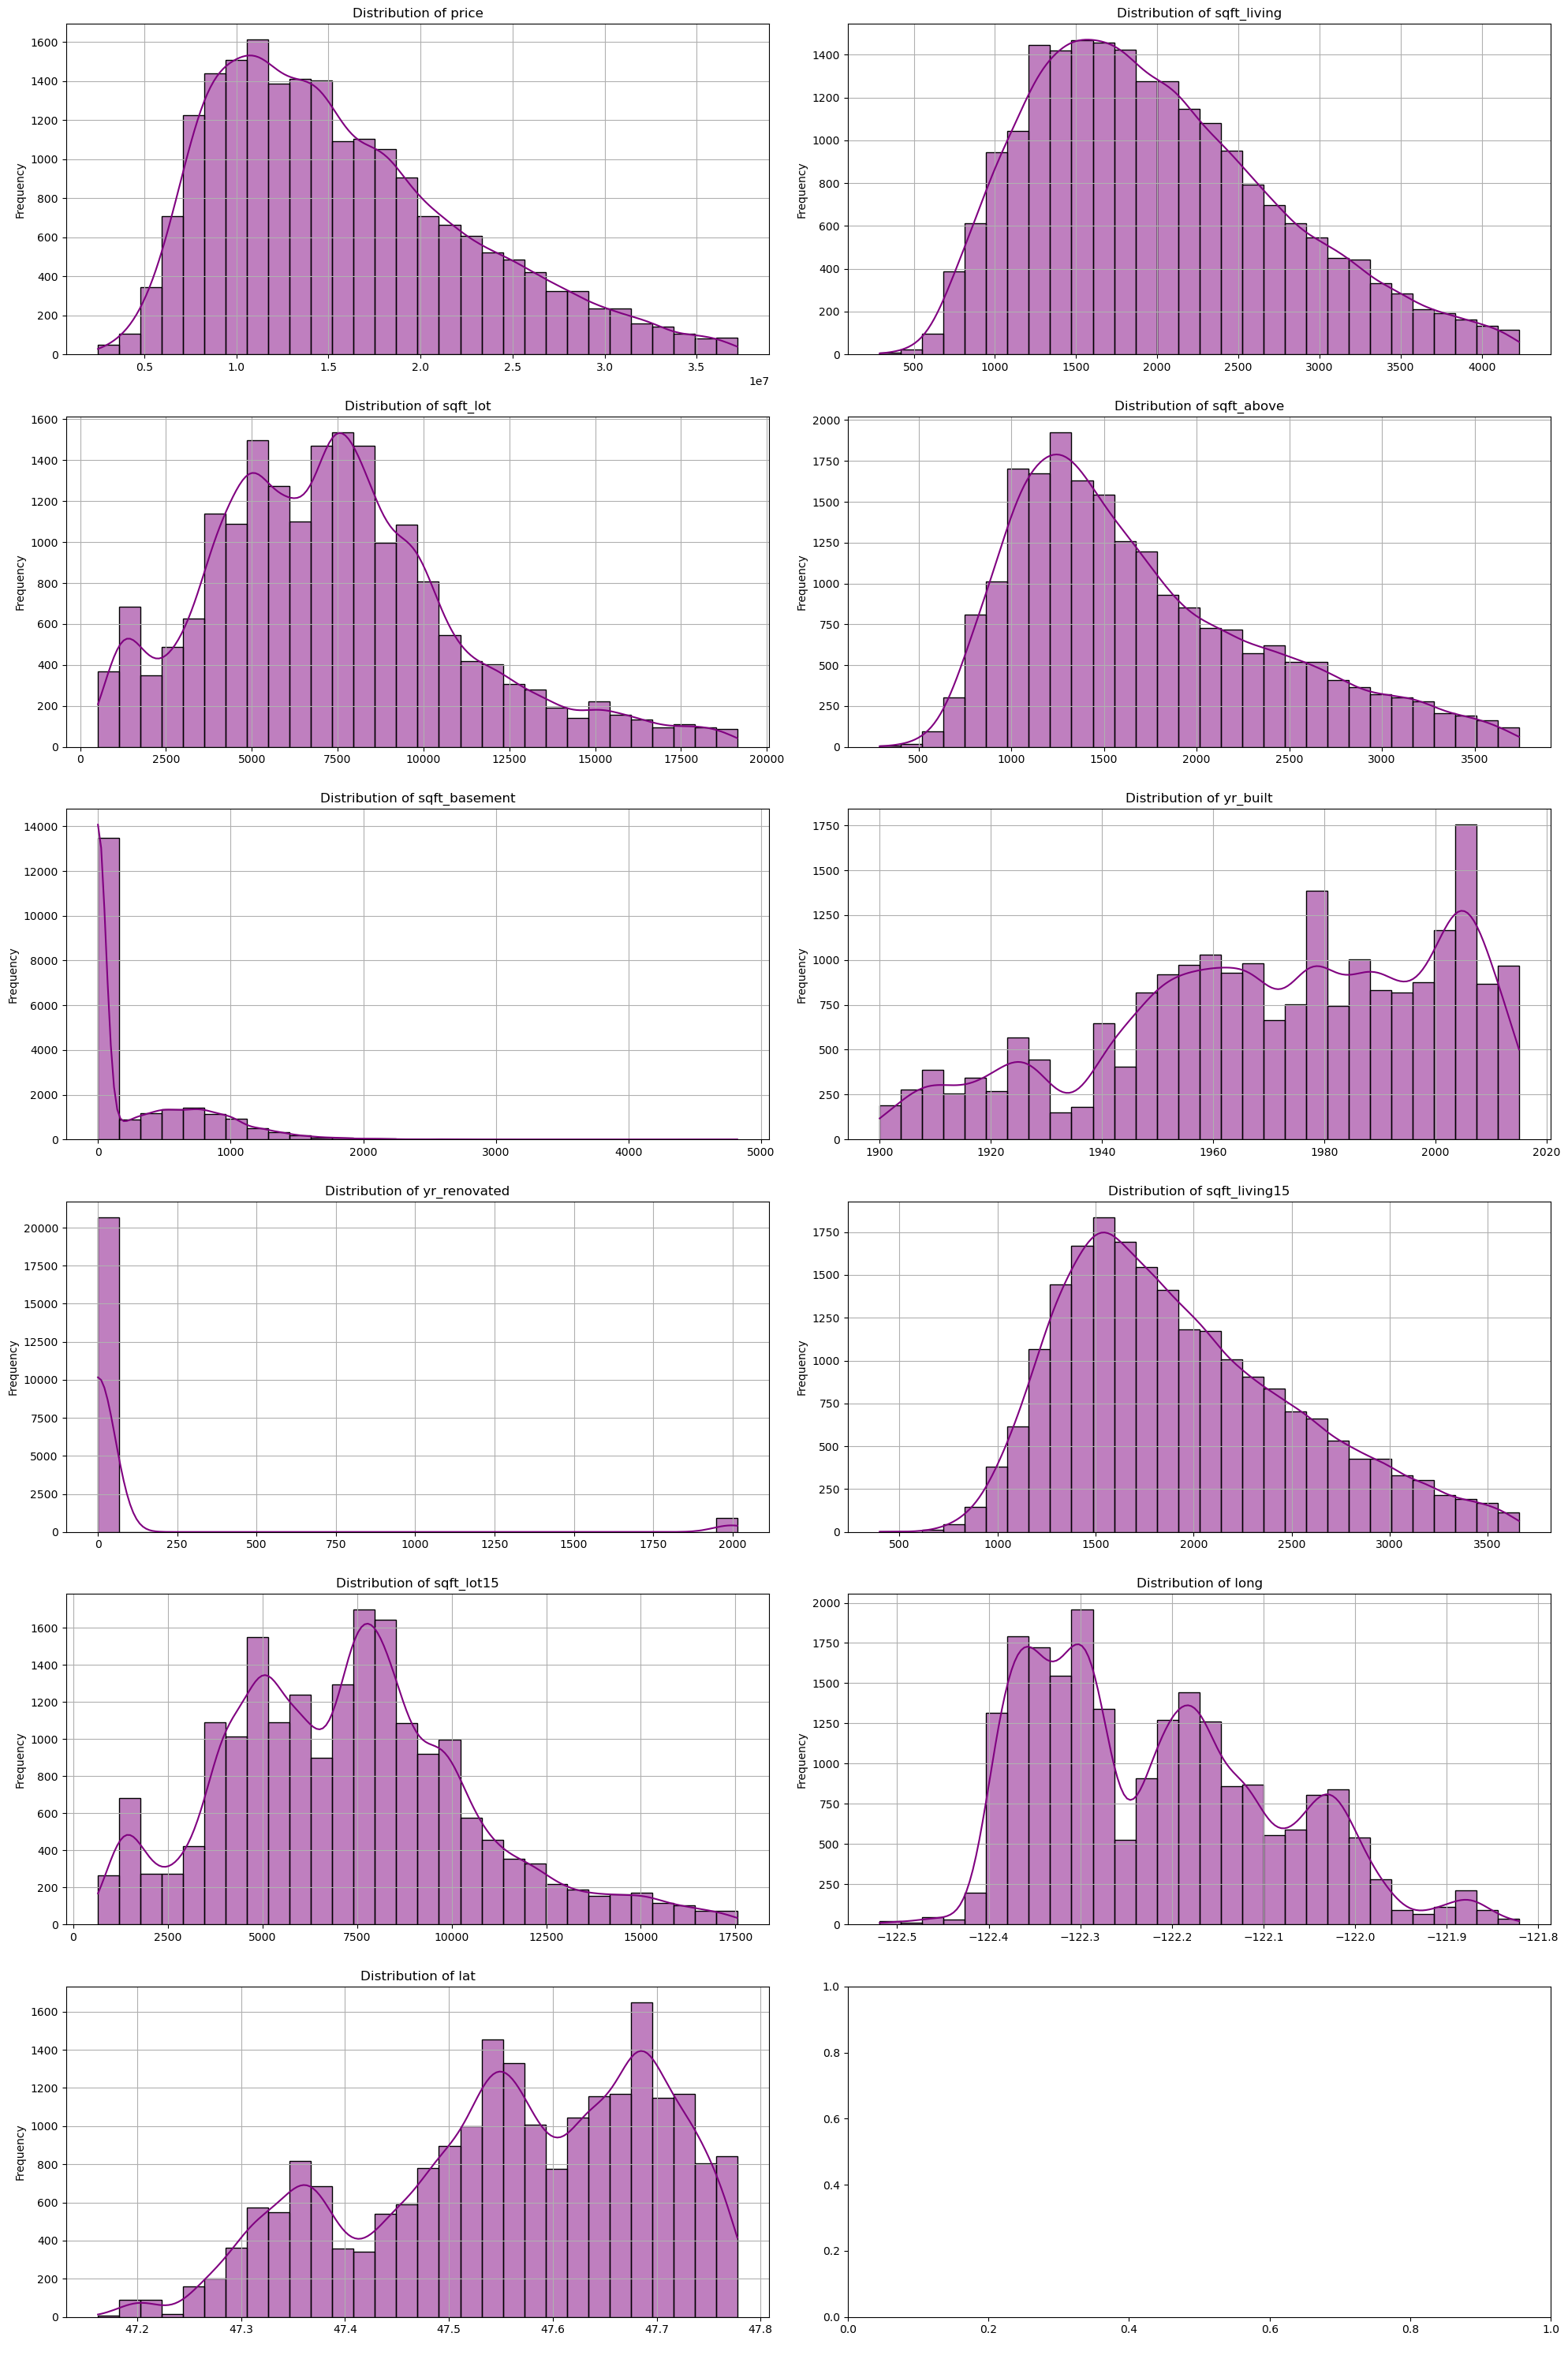

In [34]:
filtered_data = data[columns_to_keep]

histogram_columns = [
     'price', 
     'sqft_living',
     'sqft_lot', 
     'sqft_above', 
     'sqft_basement', 
     'yr_built',
     'yr_renovated',
     'sqft_living15', 
     'sqft_lot15',
     'long',
     'lat'
]

num_rows = len(histogram_columns) // 2 + len(histogram_columns) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
axes = axes.flatten()

for i, column in enumerate(histogram_columns):
    sns.histplot(filtered_data[column], bins=30, kde=True, ax=axes[i], edgecolor='black', color='purple')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Interpretations from Graphs

- **Prices**
Prices exhibit a right-skewed distribution, indicating that the majority of properties fall within the range of 200k to 600k.

- **Square Root Living Area**
Square root of living areas is right-skewed, with a concentration of properties having an area between 1000sq and 2000sq.

- **Square Root Lot Area**
Square root of lot areas is right-skewed, suggesting that most properties have a lot size ranging from 5000sq to 10000sq.

- **Square Root Above Area**
Square root of above areas is right-skewed, indicating that most properties have an above area in the range of 1000sq to 1500sq.

- **Square Root Basements Area**
Square root of basements areas is right-skewed, with a notable observation that most properties don't have a basement area, resulting in a Gaussian bell curve.

- **Year Built**
The distribution of the year built is varied, but it is left-skewed, suggesting that the majority of cities were built after the 1960s.

- **Year Renovated**
The distribution of the year renovations occurred is highly right-skewed, indicating that the majority of renovations took place after the 1990s.

- **Square Root Living15**
Similar to the square root of living area, the square root of living15 follows a right-skewed trend, with a concentration of properties having an area similar to the living area.

- **Square Root Lot15**
Similar to the square root of lot area, the square root of lot15 follows a right-skewed trend, suggesting that most properties have a lot size similar to the lot area.


### ii. Plotting Categorical, Relatively Discrete and Ordinal Data

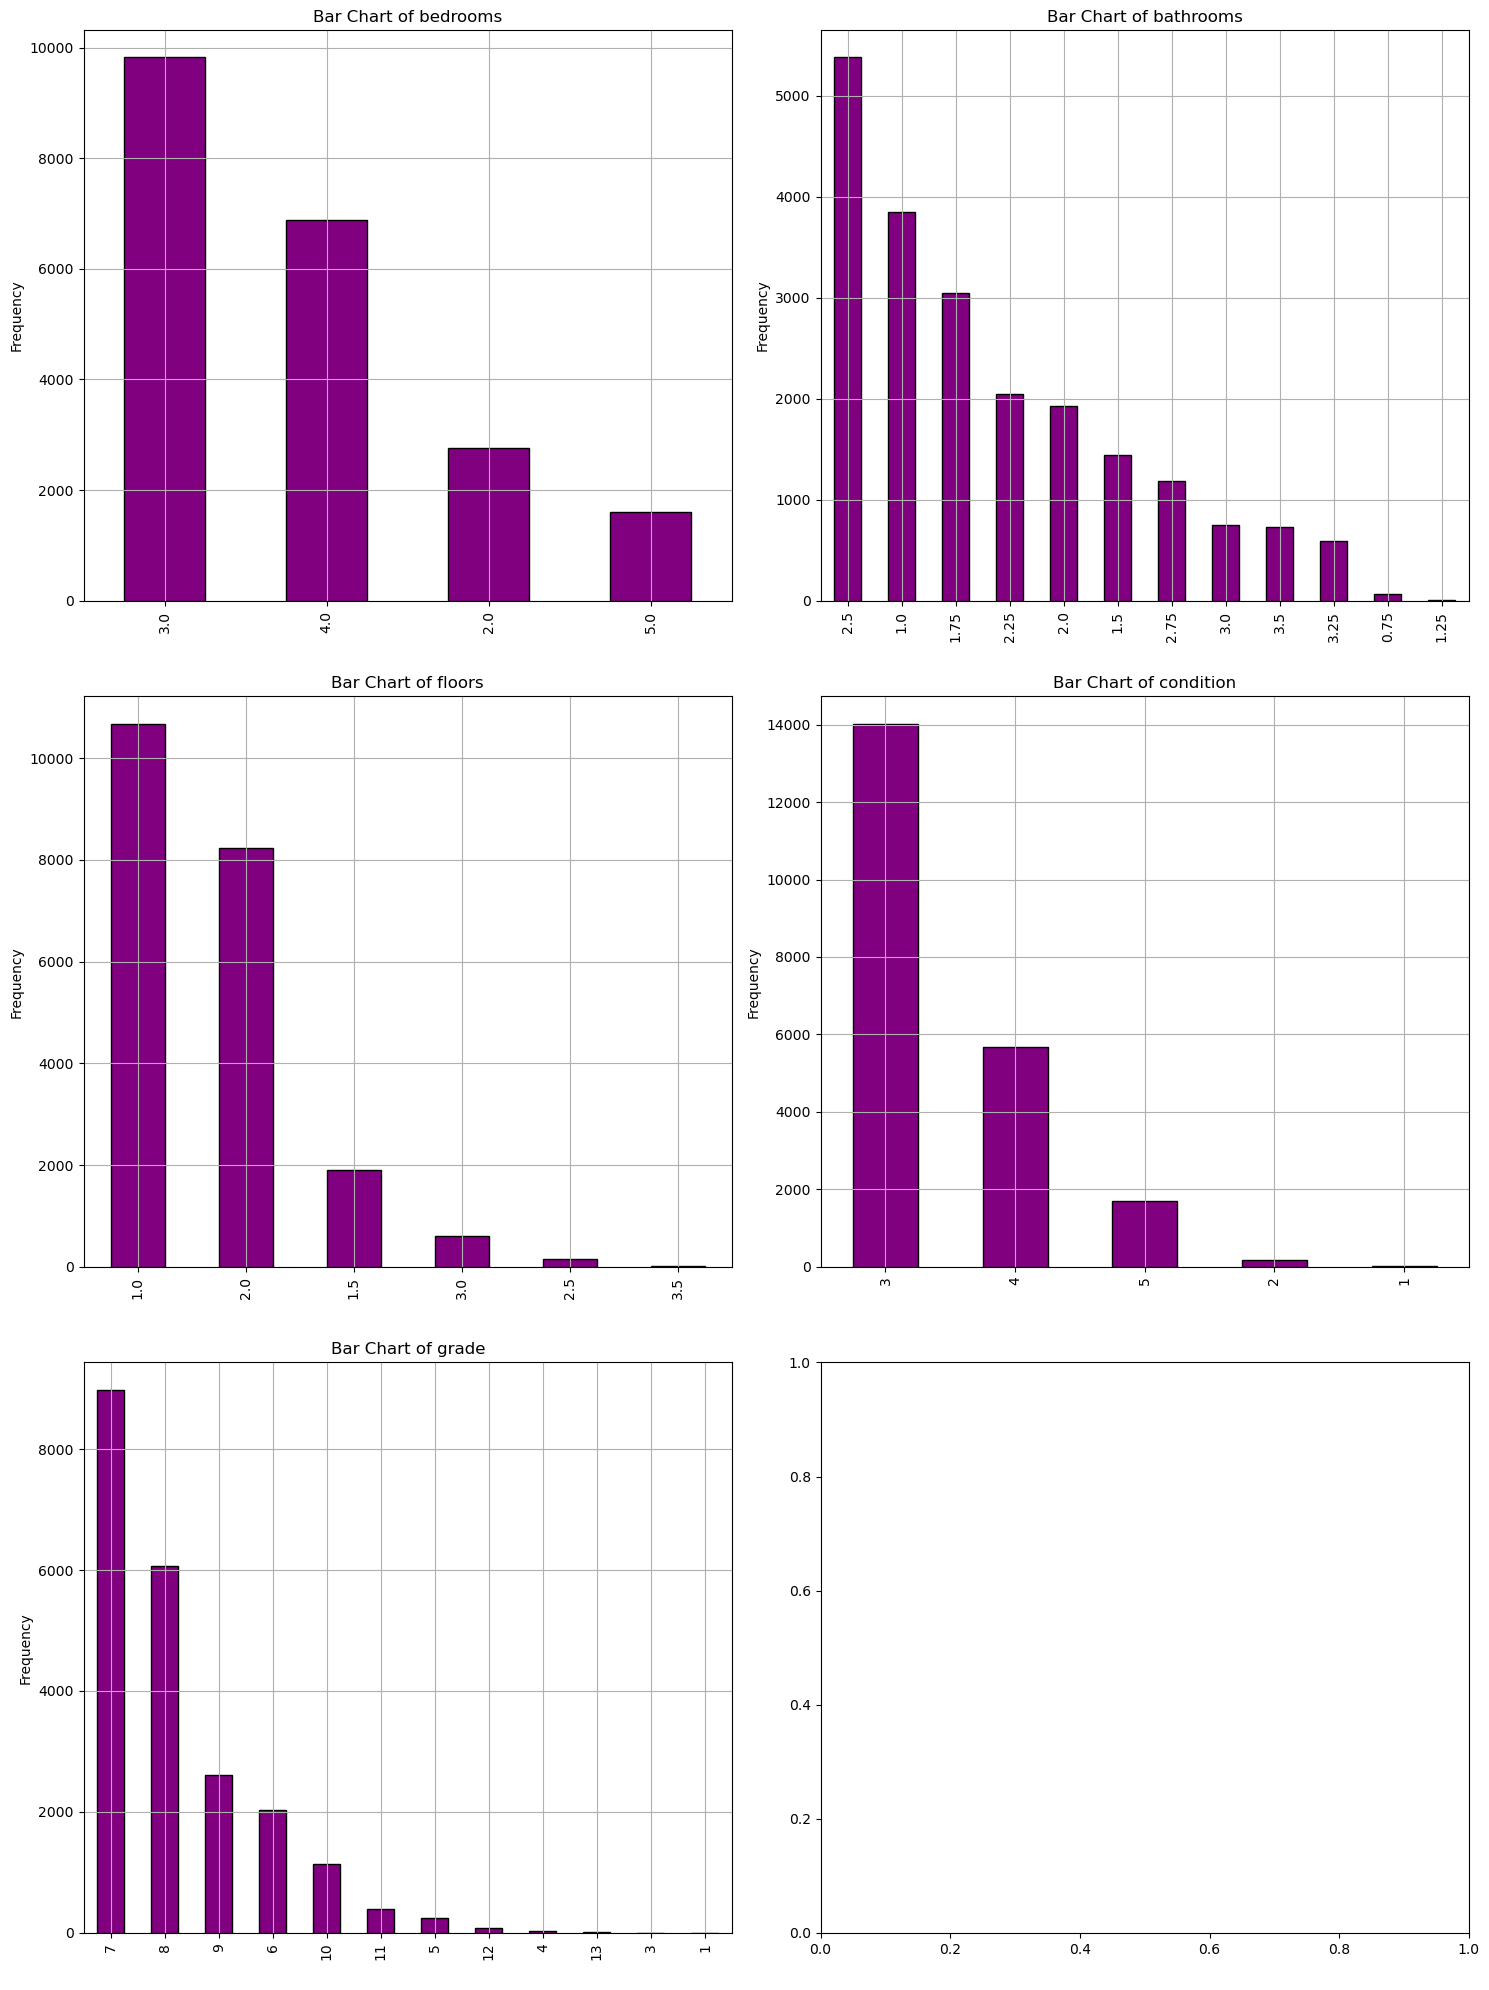

In [35]:
filtered_data = data[columns_to_keep]

bar_chart_columns = [
     'bedrooms', 
     'bathrooms', 
     'floors', 
     'condition', 
     'grade'
]

num_rows = len(bar_chart_columns) // 2 + len(bar_chart_columns) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()

sampled_data = filtered_data

for i, column in enumerate(bar_chart_columns):
    top_values = sampled_data[column].value_counts().nlargest(20)
    top_values.plot(kind='bar', ax=axes[i], edgecolor='black', color='purple')
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


### Interpretations from Bar Charts

- **Bedrooms**
The bar chart for bedrooms reveals that 3 bedrooms are the most common configuration among the sampled houses.

- **Bathrooms**
The distribution of bathrooms indicates that most houses have 2 full bathrooms and 1 half bathroom.

- **Floors**
The majority of houses have at least 1 floor, as suggested by the bar chart for the number of floors.

- **Waterfront**
The presence of waterfront in houses is negligible, as indicated by the bar chart.

- **View**
Almost all houses in the dataset have 0 view facings, as depicted by the bar chart for views.

- **Condition**
The distribution of house conditions shows that the condition of most houses is rated as 3.

- **Grade**
The bar chart for house grades suggests that the grade of the majority of houses is 7.


## 6 *Data Dependencies (Bivariate Analysis)*
Using Hexbin Plots, as it is considered best approach for both data density and data relationship. When dealing with data in large quantity and reducing space complexity, using hexbin plots are better for good understanding.

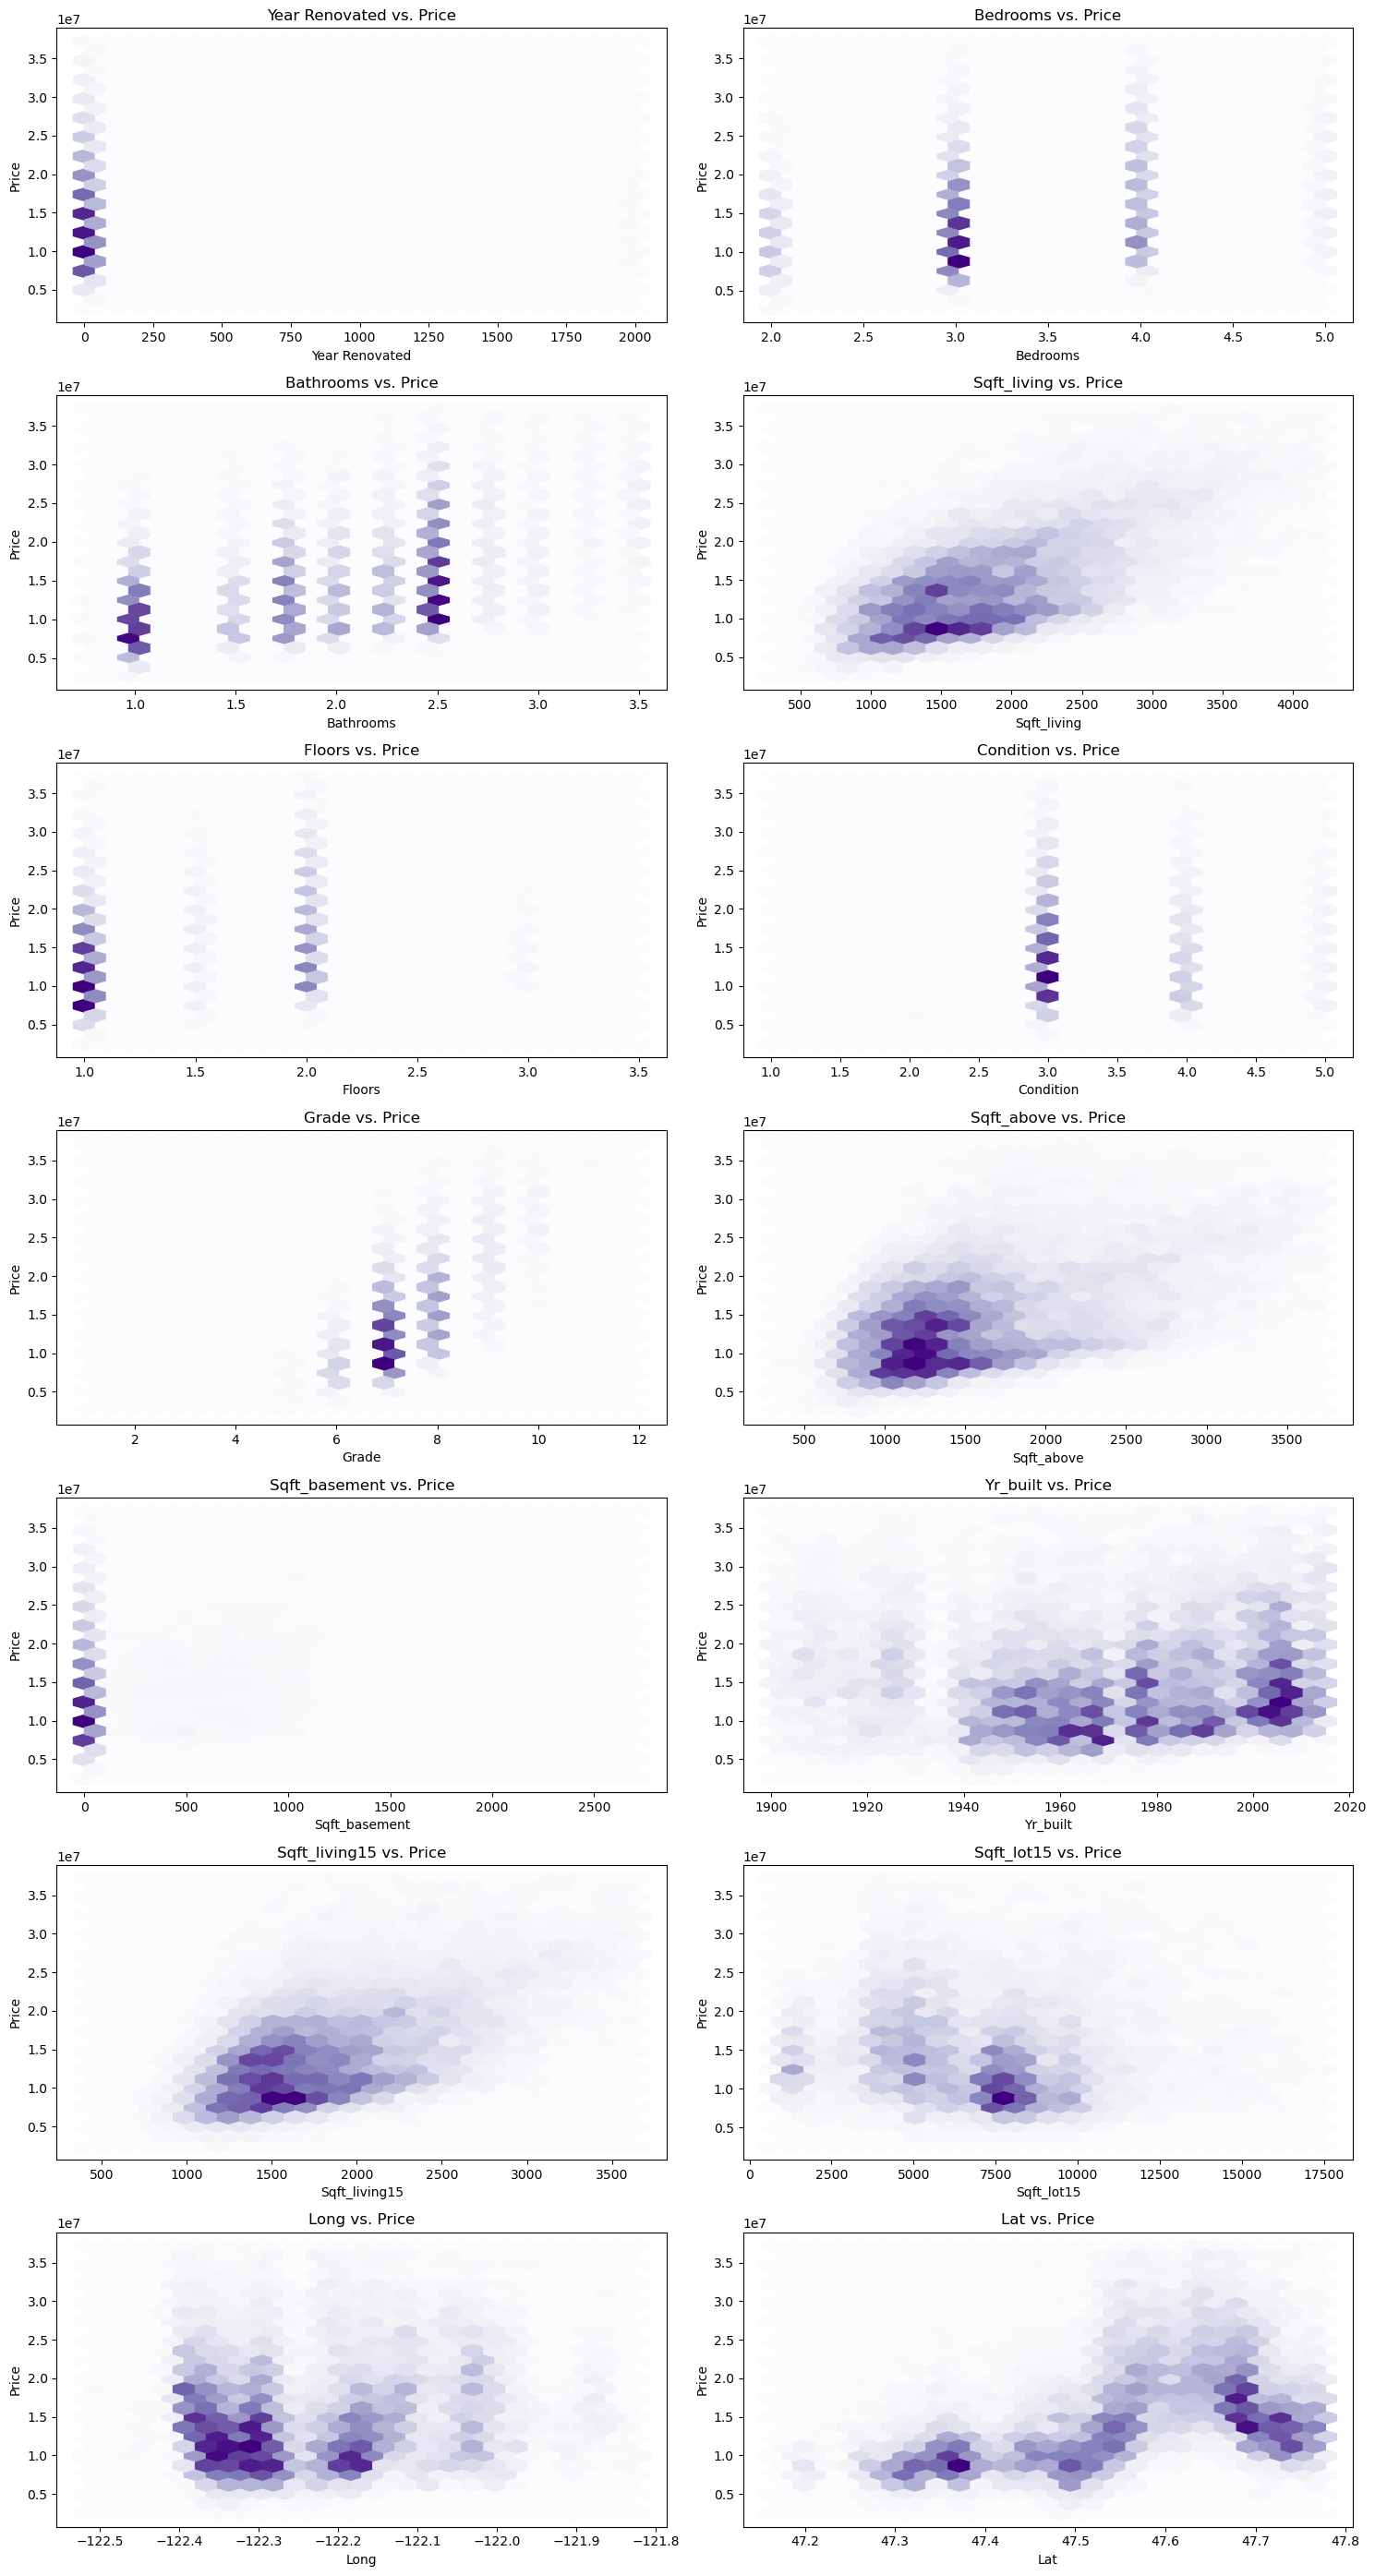

In [36]:
hexbin_variables = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'floors',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'sqft_living15',
    'sqft_lot15',
    'long',
    'lat'
]

num_rows = (len(hexbin_variables) + 1) // 2
num_cols = min(2, len(hexbin_variables))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axes = axes.flatten()

axes[0].hexbin(data['yr_renovated'], data['price'], gridsize=25, cmap='Purples')
axes[0].set_title('Year Renovated vs. Price')
axes[0].set_xlabel('Year Renovated')
axes[0].set_ylabel('Price')

for i, variable in enumerate(hexbin_variables, 1):
    axes[i].hexbin(data[variable], data['price'], gridsize=25, cmap='Purples')
    axes[i].set_title(f'{variable.capitalize()} vs. Price')
    axes[i].set_xlabel(f'{variable.capitalize()}')
    axes[i].set_ylabel('Price')


plt.tight_layout()
plt.show()


### Interpretations

- **Bedrooms and Price:**
Houses with 3 bedrooms tend to have higher prices.

- **Bathrooms and Price:**
Houses with 2.5 bathrooms tend to be associated with higher prices.

- **Sqft Living and Price:**
There is a direct relationship between the square root of living area and house prices.

- **Floors and Price:**
Single-floored houses are generally associated with lower prices.

- **Condition and Price:**
The condition of most houses is rated as 3, suggesting a commonality in lower-priced houses.

- **Grades and Price:**
There is a direct relationship between the grade assigned to a house and its price.

- **Sqft Above and Price:**
The square footage above ground has a direct relationship with house prices.

- **Sqft Basement and Price:**
Houses with no basement space (sqft basement = 0) are associated with lower prices.

- **Sqft Living15 and Price:**
There is a direct relationship between the square footage of the living area and house prices.

- **Year Built and Price:**
The year a house was built has a weak relationship with its price.

- **Sqrt Lot15 and Price:**
The square root of lot area in 2015 has a weak relationship with house prices.


## 7 *Data Transformation*

### i. Numerical Data (Z-Score and Min-Max Scalling Data)

In [37]:
feature = [
     'price', 
     'sqft_living',
     'sqft_lot', 
     'sqft_above', 
     'sqft_basement', 
     'yr_built',
     'yr_renovated',
     'sqft_living15', 
     'sqft_lot15',
     'long',
     'lat'
]

for f in feature:
    data[f] = (data[f] - data[f].min()) / (data[f].max() - data[f].min())

### iii. Categorical Data (Label Encoding)

In [38]:
feature = [
     'bedrooms', 
     'bathrooms', 
     'floors', 
     'condition', 
     'grade'
]

for f in feature:
    unique_values = data[f].unique()
    encoding_map = {value: index for index, value in enumerate(unique_values)}
    data[f] = data[f].map(encoding_map)

In [39]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,lat,long
0,0.139572,0,0,0.225888,0.275495,0,0,0,0.257971,0.000000,0.478261,0.000000,0.288562,0.295816,0.567111,0.375358
1,0.439905,0,1,0.578680,0.360990,1,0,0,0.544928,0.082988,0.443478,0.988089,0.395891,0.413516,0.908027,0.286533
2,0.099762,1,0,0.121827,0.509103,0,0,1,0.139130,0.000000,0.286957,0.000000,0.711745,0.438547,0.935489,0.409742
3,0.502613,2,2,0.423858,0.240589,0,1,0,0.220290,0.188797,0.565217,0.000000,0.294695,0.257353,0.582710,0.180516
4,0.413302,0,3,0.352792,0.405993,0,0,2,0.402899,0.000000,0.756522,0.000000,0.429623,0.405468,0.738707,0.679083


## 8 *Storing data for next step*

In [42]:
data.to_csv("cleaned_data.csv", index=False)

In [43]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()
print(f"Rows: {data.shape[0]}\nColumns: {data.shape[1]}")

Rows: 21602
Columns: 16


## 9 *Descriptive Analysis*

### i. Matrix

In [40]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,lat,long
price,1.000000,0.228773,0.282076,0.611858,-0.000158,0.234379,-0.047283,0.501382,0.494697,0.235762,0.061175,0.083571,0.533020,-0.002463,0.431016,0.093938
bedrooms,0.228773,1.000000,0.146892,0.399868,0.102808,0.092019,-0.014369,0.241171,0.305814,0.241295,0.021442,0.029388,0.265822,0.086635,0.038827,0.061220
bathrooms,0.282076,0.146892,1.000000,0.449710,0.034077,0.127050,-0.107656,0.263644,0.377552,0.175691,0.345101,0.013499,0.341935,0.037375,-0.002408,0.183204
sqft_living,0.611858,0.399868,0.449710,1.000000,0.235526,0.206066,-0.111676,0.562224,0.834098,0.370992,0.328650,0.051263,0.723728,0.219545,0.040575,0.278071
sqft_lot,-0.000158,0.102808,0.034077,0.235526,1.000000,-0.322000,0.163483,0.114262,0.183419,0.130552,-0.022400,0.002661,0.276225,0.875297,-0.129851,0.238495
floors,0.234379,0.092019,0.127050,0.206066,-0.322000,1.000000,-0.175332,0.234166,0.349857,-0.188242,0.158743,0.030594,0.108188,-0.333289,0.098161,-0.023776
condition,-0.047283,-0.014369,-0.107656,-0.111676,0.163483,-0.175332,1.000000,-0.142244,-0.185318,0.113443,-0.347079,-0.064652,-0.100091,0.168086,-0.054992,-0.084527
grade,0.501382,0.241171,0.263644,0.562224,0.114262,0.234166,-0.142244,1.000000,0.587764,0.080004,0.307895,0.018069,0.561374,0.128976,0.069786,0.205988
sqft_above,0.494697,0.305814,0.377552,0.834098,0.183419,0.349857,-0.185318,0.587764,1.000000,-0.083314,0.431515,0.025671,0.692433,0.170516,-0.026726,0.374164
sqft_basement,0.235762,0.241295,0.175691,0.370992,0.130552,-0.188242,0.113443,0.080004,-0.083314,1.000000,-0.133504,0.071486,0.175259,0.129749,0.110514,-0.140048


### ii. Heatmap

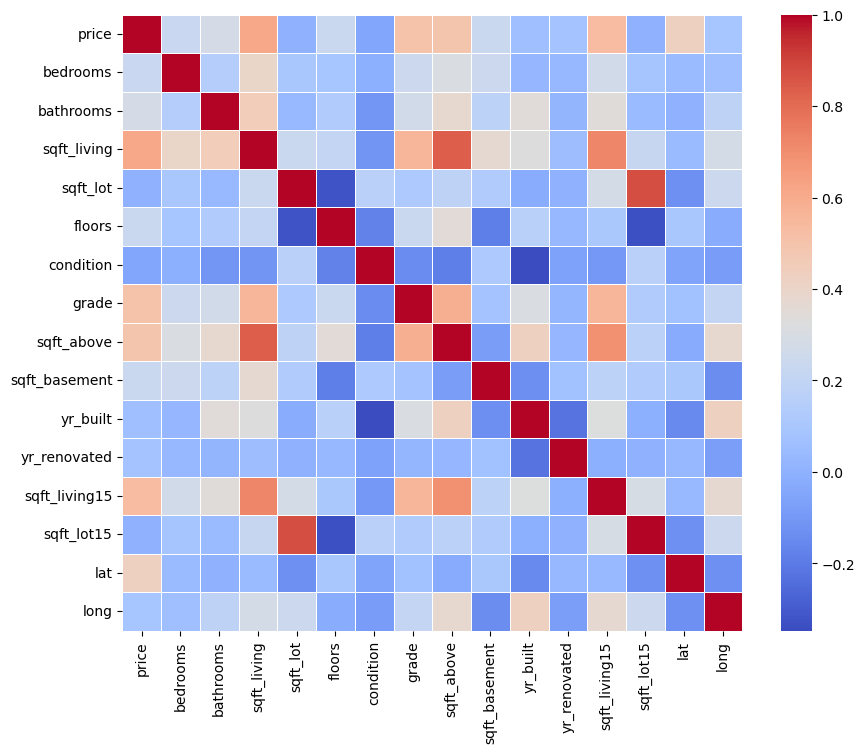

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

## 10 *Summary of Analyses*

### General Observations

- The dataset contains information on various housing features and their corresponding prices.

### Feature Analysis/Pattern Findings

1. **Bedrooms and Price:**
Houses with 3 bedrooms tend to have higher prices.

2. **Bathrooms and Price:**
Houses with 2.5 bathrooms tend to be associated with higher prices.

3. **sqrt_living and Price:**
There is a direct relationship between the square root of living area and house prices.

4. **Floors and Price:**
Single-floored houses are generally associated with lower prices.

5. **Condition and Price:**
The condition of most houses is rated as 3, suggesting a commonality in lower-priced houses.

6. **Grades and Price:**
There is a direct relationship between the grade assigned to a house and its price.

7. **sqft_above and Price:**
The square footage above ground has a direct relationship with house prices.

8. **sqft_basement and Price:**
Houses with no basement space (sqft basement = 0) are associated with lower prices.

9. **sqft_living and Price:**
There is a direct relationship between the square footage of the living area and house prices.

10. **Year Built and Price:**
The year a house was built has a weak relationship with its price.

11. **sqrt_lot15 and Price:**
The square root of lot area in 2015 has a weak relationship with house prices.

### Correlation Heatmap

1. Plus if we talk about the heatmap, it seems that there is a moderate relationship of price with Bedrooms, Grades and Living Area. It would help in detemining the strength of the model in our next part.
2. There is a strong relationship between the property price and property price in the area.
3. Lastly, Houses with no waterfront tends to have more chances of 0 view. 


# Project Part - II

## 11 *Reading Preprocessed Data ready to model*

In [3]:
data=pd.read_csv("cleaned_data.csv")

## 12 *Applying Gaussian Boosting Regressor* 

In [4]:
# Our targeted variable
data=data.dropna()
X = data.drop('price', axis=1)
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

In [5]:
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'Correlation Coefficient (r): {np.corrcoef(y_test, y_pred)[0, 1]}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}')

R^2 Score: 0.8525528464678309
Correlation Coefficient (r): 0.9234422246117475
Root Mean Squared Error (RMSE): 0.06797706241206602
Mean Squared Error (MSE): 0.004620881014173919
Mean Absolute Error (MAE): 0.04966458404776497


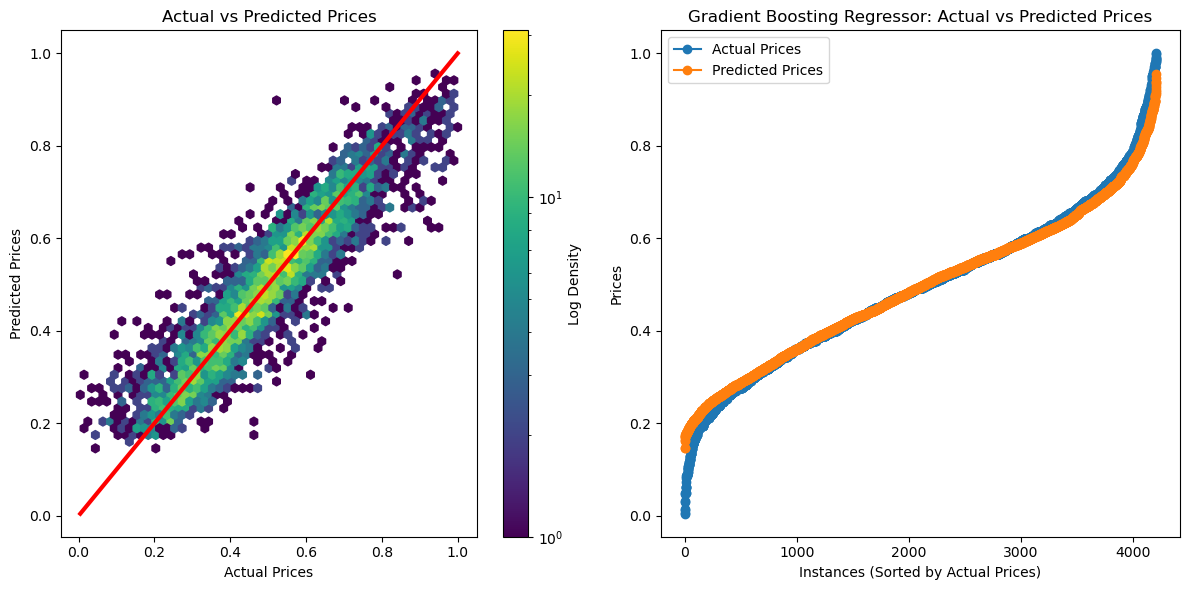

In [6]:
# Plotting the hexbin plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.hexbin(y_test, y_pred, gridsize=50, cmap='viridis', bins='log')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', linewidth=3)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.colorbar(label='Log Density')

# Plotting the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
sorted_indices = np.argsort(y_test)
plt.plot(np.arange(len(y_test)), np.sort(y_test), label='Actual Prices', marker='o')
plt.plot(np.arange(len(y_test)), np.sort(y_pred), label='Predicted Prices', marker='o')
plt.title('Gradient Boosting Regressor: Actual vs Predicted Prices')
plt.xlabel('Instances (Sorted by Actual Prices)')
plt.ylabel('Prices')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


## 13 *Model Accuracy Report*

- R² Score:
The R² score is a measure of how well the model's predictions match the actual values. In this case, the R² score is approximately 0.86, indicating that the model explains about 86% of the variance in the target variable. A higher R² score suggests a better fit of the model to the data.

- Correlation Coefficient (r):
The correlation coefficient measures the strength and direction of a linear relationship between the predicted and actual values. With a correlation coefficient of approximately 0.92, there is a strong positive linear relationship, indicating that as the predicted values increase, the actual values tend to increase as well.

- Root Mean Squared Error (RMSE):
The RMSE provides an estimate of the average deviation between predicted and actual values. In this case, the RMSE is approximately 0.067, suggesting that, on average, the model's predictions deviate by about 0.067 units from the actual values.

- Mean Squared Error (MSE):
The MSE is similar to the RMSE but without the square root. It represents the average of the squared differences between predicted and actual values. The MSE is approximately 0.0045, providing another measure of the model's accuracy.

- Mean Absolute Error (MAE):
The MAE measures the average absolute difference between predicted and actual values. With a value of approximately 0.049, the model's predictions, on average, deviate by about 0.049 units from the actual values.

## 14 *Adjusting Bias and Variance*

In [7]:
def get_value(input_col):
    
    min_list = [290, 520, 290, 0, 1900, 0, 47.1559, -122.387, 399, 651]
    max_list = [4230, 19141, 3740, 4820, 2015, 2015, 47.7776, -121.979, 3660, 17550]
    
    bias = 1000000
    
    if (input_col['sqft_living'] > 4000 or input_col['sqft_above'] > 4000):
        bias *= 4
    if (input_col['sqft_living'] > 5000 or input_col['sqft_above'] > 5000):
        bias *= 12
    if (input_col['sqft_living'] > 7000 or input_col['sqft_above'] > 7000):
        bias *= 2
    
    input_col['sqft_living']*=input_col['floors']
    
    label_encoded_values = [int(input_col[col]) - 1 for col in ['floors', 'bedrooms', 'bathrooms', 'grade', 'condition']]
    
    normalized_values = [(input_col[col] - min_val) / (max_val - min_val) for col, min_val, max_val in zip(
        ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
         'sqft_living15', 'sqft_lot15'], min_list, max_list)]

    result = label_encoded_values + normalized_values
    
    columns_order = [
        'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
        'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
    ]

    result = [result[columns_order.index(col)] for col in columns_order]

    result_array = np.array(result).reshape(1, -1)
    predicted_price = gb_regressor.predict(result_array)
    
    # Adjusting the predicted price within the specified range
    adjusted_price = ((predicted_price * (37207500 - 2475000)) + 2475000 + bias)[0]
    # Rounding to the nearest hundred thousand and converting to int
    rounded_price = int(round(adjusted_price / 100000) * 100000)

    # Formatting the price with commas
    formatted_price = '{:,}'.format(rounded_price)

    return formatted_price


**Test Case - I**

In [8]:
input_data = {
    'floors': 2,
    'bedrooms': 6,
    'bathrooms': 6,
    'grade': 8,
    'condition': 5,
    'sqft_living': 5400, 
    'sqft_lot': 5400,
    'sqft_above': 5400,
    'sqft_basement': 0,
    'yr_built': 2010,
    'yr_renovated': 2010,
    'lat': 36,
    'long': 67,
    'sqft_living15': 5400,
    'sqft_lot15': 5400
}

result = get_value(input_data)
print(f'Predicted Price: {result} Rs.')

Predicted Price: 70,300,000 Rs.


**Test Case - II**

In [9]:
input_data = {
    'floors': 3,
    'bedrooms': 6,
    'bathrooms': 6,
    'grade': 8,
    'condition': 5,
    'sqft_living': 1300, 
    'sqft_lot': 1300,
    'sqft_above': 1300,
    'sqft_basement': 0,
    'yr_built': 2004,
    'yr_renovated': 2016,
    'lat': 36,
    'long': 67,
    'sqft_living15': 1300,
    'sqft_lot15': 1300
}

result = get_value(input_data)
print(f'Predicted Price: {result} Rs.')

Predicted Price: 18,700,000 Rs.


## 15 *User Prompt / Desktop Application*

In [10]:
label_ranges = {
    'bedrooms': (1, 15),
    'bathrooms': (1, 12),
    'floors': (1, 3),
    'condition': (1, 5),
    'grade': (1, 9),
    'sqft_living': (1000, 8500, 50),
    'sqft_lot': (1000, 8500, 50),
    'sqft_above': (1000, 8500, 50),
    'sqft_basement': (1000, 8500, 50),
    'yr_built': (1900, 2020, 5),
    'yr_renovated': (1900, 2020, 5),
    'lat': (23, 37),
    'long': (60, 77),
    'sqft_living15': (1000, 8500, 50),
    'sqft_lot15': (1000, 8500, 50)
}

In [11]:
# Create the main window
root = tk.Tk()
root.title("House Feature Calculator")
root.geometry("400x600")

# Add a title label
title_label = ttk.Label(root, text="HOUSE PRICE PREDICTOR", font=("Helvetica", 18, "bold"))
title_label.grid(row=0, column=0, columnspan=2, pady=10, padx=10)

# Create dropdown menus and labels
numbers = {}
dropdowns = {}

for i, label_name in enumerate(label_ranges.keys()):  # Iterate over label_ranges keys
    label = tk.Label(root, text=f"{label_name.upper().replace('_', ' ')}:")
    label.grid(row=i+1, column=0, padx=10, pady=5, sticky="w")

    # Set the range of values based on the label name
    start, end, gap = label_ranges[label_name] if len(label_ranges[label_name]) == 3 else label_ranges[label_name] + (1,)
    values = list(range(start, end + 1, gap))
    
    var = tk.StringVar(value=str(values[0]))  # Convert values to strings
    dropdown = ttk.Combobox(root, textvariable=var, values=list(map(str, values)), state="readonly")
    dropdown.grid(row=i+1, column=1, padx=5, pady=5)
    dropdowns[label_name] = dropdown

    # Initialize the dictionary with default values
    numbers[label_name] = values[0]

    # Bind the function to the dropdown change event
    dropdown.bind("<<ComboboxSelected>>", lambda event, ln=label_name: on_dropdown_change(ln, event))

In [12]:
# Create a button to get the value
get_value_button = tk.Button(root, font=("Helvetica", 12, "bold"), text="ESTIMATE PRICE", command=lambda: get_and_display_value(numbers))
get_value_button.grid(row=len(label_ranges)+1, padx=10, column=0, columnspan=2, pady=10, sticky="w")

# Create a label to display the result
result_label = tk.Label(root, text="APPROX. PRICE: ", font=("Helvetica", 10, "bold"))
result_label.grid(row=len(label_ranges)+2, column=0, columnspan=2, sticky="w", padx=10)

def on_dropdown_change(label_name, event):
    # Update the dictionary when a dropdown value changes
    numbers[label_name] = int(dropdowns[label_name].get())

def get_and_display_value(numbers):
    value = get_value(numbers)
    result_label.config(text=f"APPROX. PRICE: {value} Rs.")

In [13]:
# Run the Tkinter main loop
root.mainloop()

## 16 *Conclusion*
Overall, the model demonstrates high accuracy, as evidenced by the high R² score, strong correlation coefficient, and relatively low RMSE, MSE, and MAE values. These metrics collectively indicate that the model performs well in predicting the target variable, with a strong linear relationship and minimal prediction errors.
